In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [33]:
def schwefel(x):
    return 418.9829 * len(x) - sum(x_i * np.sin(np.sqrt(abs(x_i))) for x_i in x)

In [34]:
POPULATION_SIZE = 100
GENES_DIMENSION = 2
GENERATIONS = 200
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.7
SEARCH_RANGE = (-500, 500)

In [35]:
def initialize_population(size, dimension, search_range):
    return np.random.uniform(search_range[0], search_range[1], (size, dimension))

In [36]:
# Оцінка придатності
def evaluate_fitness(population, func):
    return np.array([func(ind) for ind in population])

In [37]:
# Відбір (турнірний)
def tournament_selection(population, fitness, k=3):
    selected_indices = np.random.choice(len(population), k, replace=False)
    winner_index = selected_indices[np.argmin(fitness[selected_indices])]
    return population[winner_index]

In [38]:
# Схрещування (одна точка перетину)
def crossover(parent1, parent2):
    if np.random.rand() < CROSSOVER_RATE:
        point = np.random.randint(1, len(parent1))
        return np.concatenate((parent1[:point], parent2[point:])), \
               np.concatenate((parent2[:point], parent1[point:]))
    return parent1, parent2

In [39]:
# Мутація
def mutate(individual, mutation_rate, search_range):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = np.random.uniform(search_range[0], search_range[1])
    return individual

In [40]:
# Основний цикл генетичного алгоритму
def genetic_algorithm(func, dimension, generations, pop_size, search_range):
    population = initialize_population(pop_size, dimension, search_range)
    fitness_history = []
    start_time = time.time()

    for gen in range(generations):
        fitness = evaluate_fitness(population, func)
        fitness_history.append(fitness.min())

        new_population = []
        for _ in range(pop_size // 2):
            parent1 = tournament_selection(population, fitness)
            parent2 = tournament_selection(population, fitness)
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1, MUTATION_RATE, search_range))
            new_population.append(mutate(child2, MUTATION_RATE, search_range))

        population = np.array(new_population)

    end_time = time.time()
    best_index = np.argmin(evaluate_fitness(population, func))
    return population[best_index], func(population[best_index]), fitness_history, end_time - start_time

In [41]:
# Пошук мінімуму
best_individual_min, best_fitness_min, fitness_history_min, elapsed_time_min = genetic_algorithm(
    schwefel, GENES_DIMENSION, GENERATIONS, POPULATION_SIZE, SEARCH_RANGE)

In [42]:
print("Мінімум:")
print(f"Координати: {best_individual_min}")
print(f"Значення: {best_fitness_min}")
print(f"Час: {elapsed_time_min:.2f} сек")

Мінімум:
Координати: [420.88705754 420.97816339]
Значення: 0.0008786490468537522
Час: 1.25 сек


In [43]:
# Пошук максимуму
def schwefel_max(x):
    return -schwefel(x)

In [44]:
best_individual_max, best_fitness_max, fitness_history_max, elapsed_time_max = genetic_algorithm(
    schwefel_max, GENES_DIMENSION, GENERATIONS, POPULATION_SIZE, SEARCH_RANGE)

In [45]:
print("\nМаксимум:")
print(f"Координати: {best_individual_max}")
print(f"Значення: {-best_fitness_max}")
print(f"Час: {elapsed_time_max:.2f} сек")


Максимум:
Координати: [-420.22559923 -420.01818924]
Значення: 1675.747941966507
Час: 1.26 сек


In [46]:
# Візуалізація результатів
x = np.linspace(-500, 500, 400)
y = np.linspace(-500, 500, 400)
X, Y = np.meshgrid(x, y)
Z = schwefel([X, Y])

plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

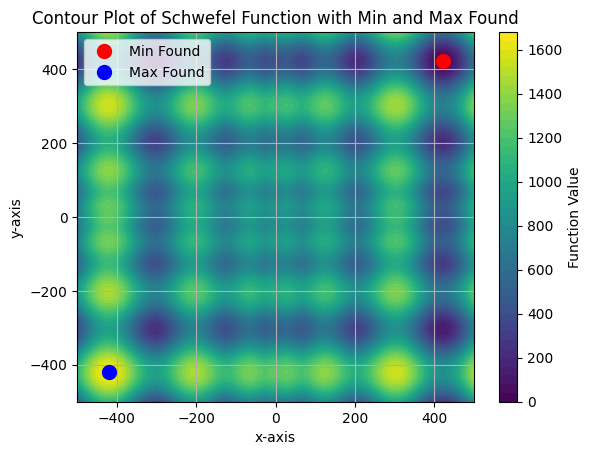

In [47]:
# Побудова контурної діаграми функції Швефеля
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label="Function Value")

# Візуалізація знайденого мінімуму та максимуму
plt.plot(best_individual_min[0], best_individual_min[1], 'ro', markersize=10, label='Min Found')
plt.plot(best_individual_max[0], best_individual_max[1], 'bo', markersize=10, label='Max Found')

# Додавання підписів осей та заголовка
plt.title("Contour Plot of Schwefel Function with Min and Max Found")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid(True)

# Відображення графіка
plt.show()